In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'x1': [0.5, 1.0, 1.5, 2.0, -1.0, -2.0, -1.5, 2.0, 0.0, -0.5,
           -1.8, 2.2, 1.3, 0.8, -0.9, 2.5, -2.5, -1.2, 1.8, -1.7,
           0.6, -2.2, 2.3, 0.4, -0.3, 1.9, -2.3, 1.1, -1.1, 0.2],

    'x2': [0.5, 1.0, 1.5, 2.0, -1.0, -2.0, 1.5, -2.0, 0.0, -1.0,
           1.6, -1.9, 1.7, -0.4, -1.1, 2.4, -2.4, 1.1, -1.8, 1.6,
           -0.5, 2.1, -2.1, 0.2, -0.2, -1.5, 1.9, -1.3, 1.2, 0.1],

    'y':  [0,   0,   1,   1,   0,    1,    1,   1,   0,   0,
           1,   1,   1,   0,   0,   1,    1,    1,   1,    1,
           0,   1,    1,   0,   0,   1,    1,   0,   1,   0]
}

In [3]:
df = pd.DataFrame(data)

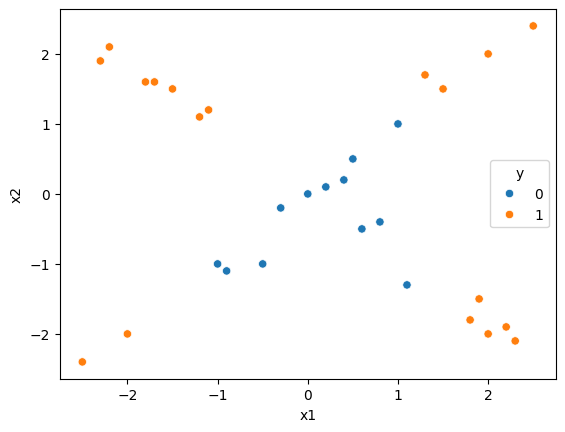

In [4]:
sns.scatterplot(x="x1",y="x2",data=df,hue="y")
plt.show()

In [5]:
x = df.iloc[:,:-1]
y = df["y"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
lr.score(x_test,y_test)*100

100.0

In [31]:
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions

In [32]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('clf', LogisticRegression())
])

In [33]:
X = df[['x1', 'x2']].values
y = df['y'].values

In [34]:
model.fit(X, y)

,steps,"[('poly', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,penalty,'l2'
,dual,False
,tol,0.0001


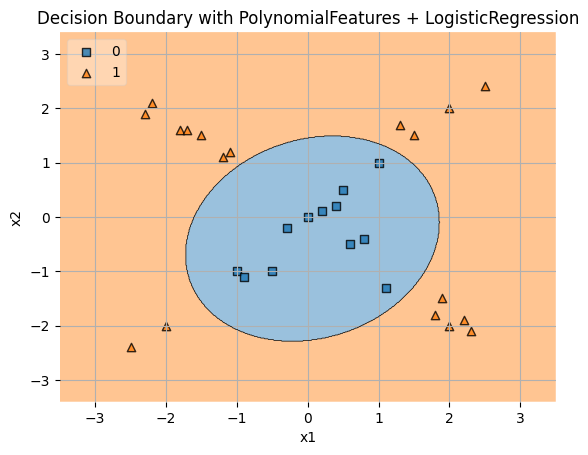

In [35]:
plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with PolynomialFeatures + LogisticRegression')
plt.grid(True)
plt.show()